# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Import functions

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Task 1: Clean data
In this section, for each column, I will be checking the data type, determining the number of missing values, and describe any data cleaning peformed.

In [88]:
# Read in data as pandas dataframe
df=pd.read_csv('electric_bike_ratings_2212.csv')

# Check 1st column
print('Data type of owned originally is:', df.owned.dtypes)
print('Number of missing values in owned is:', df['owned'].isna().sum())
df['owned']=df['owned'].astype('category')
print('Data type of owned now is:', df.owned.dtypes, '\n')

# Check 2nd column
print('Data type of make_model originally is:', df.make_model.dtypes)
print('Number of missing values in make_model is:', df['make_model'].isna().sum())
df['make_model']=df['make_model'].astype('category')
print('Data type of make_model now is:', df.make_model.dtypes, '\n')

# Check 3rd column
print('Data type of review_month originally is:', df.review_month.dtypes)
print('Number of missing values in review_month is:', df['review_month'].isna().sum())
print(df.review_month.value_counts())
df['review_month']=df['review_month'].str.replace('\d+-', '')
df['review_month']=pd.Categorical(df['review_month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
print('Data type of review_month now is:', df.review_month.dtypes, '\n')


# Check 4th column
print('Data type of web_browser originally is:', df.web_browser.dtypes)
print('Number of missing values in web_browser is:', df['web_browser'].isna().sum())
df.web_browser=df.web_browser.fillna('unknown')
df['web_browser']=df['web_browser'].astype('category')
print('Data type of web_browser now is:', df.web_browser.dtypes, '\n')

# Check 5th column
print('Data type of reviewer_age originally is:', df.reviewer_age.dtypes)
print('Number of missing values in reviewer_age is:', df['reviewer_age'].isna().sum())
print(df.reviewer_age.value_counts())
df.loc[df['reviewer_age']=='-', 'reviewer_age'] = None
print('Number of missing values in reviewer_age is:', df['reviewer_age'].isna().sum())
df.reviewer_age = pd.to_numeric(df.reviewer_age)
mean_age=round(df.reviewer_age.mean())
df.reviewer_age=df.reviewer_age.fillna(mean_age)
df.reviewer_age=df.reviewer_age.astype(int)
df['reviewer_age']=df['reviewer_age'].astype('int')
print('Data type of reviewer_age now is:', df.reviewer_age.dtypes, '\n')

# Check 6th column
print('Data type of primary_use originally is:', df.primary_use.dtypes)
print('Number of missing values in primary_use is:', df['primary_use'].isna().sum())
df.primary_use=df.primary_use.astype('category')
print('Data type of primary_use now is:', df.primary_use.dtypes, '\n')

# Check 7th column
print('Data type of value_for_money originally is:', df.value_for_money.dtypes)
print('Number of missing values in value_for_money is:', df['value_for_money'].isna().sum())
df.value_for_money = df.value_for_money.str.split('/', expand=True)[0].astype(int)
print('Data type of value_for_money now is:', df.value_for_money.dtypes, '\n')

# Check 8th column
print('Data type of overall_rating originally is:', df.overall_rating.dtypes)
print('Number of missing values in overall_rating is:', df['overall_rating'].isna().sum())

Data type of owned originally is: int64
Number of missing values in owned is: 0
Data type of owned now is: category 

Data type of make_model originally is: object
Number of missing values in make_model is: 0
Data type of make_model now is: category 

Data type of review_month originally is: object
Number of missing values in review_month is: 0
Sep       73
Mar       72
May       68
Nov       67
Apr       65
          ..
10-Jul     1
18-Aug     1
14-Apr     1
20-Sep     1
06-Aug     1
Name: review_month, Length: 332, dtype: int64
Data type of review_month now is: category 

Data type of web_browser originally is: object
Number of missing values in web_browser is: 150
Data type of web_browser now is: category 

Data type of reviewer_age originally is: object
Number of missing values in reviewer_age is: 0
-     105
19     52
41     51
45     50
18     46
44     46
20     46
40     45
17     45
37     45
30     45
39     45
23     43
16     43
48     42
46     41
21     41
22     40
33   

## Description of data cleaning performed
1. **owned:** I changed the data type from integer to categorical. No missing values were present.
2. **make_model:** I changed the data type from string to categorical. No missing values were present.
3. **review_month:** I changed the data type from string to categorical, with the months ordered from January to December. No missing values were present, but some were in DD-Month format, rather than Month. I removed the DD and hyphen, leaving only the Month in place.
4. **web_browser:** I changed the data type from string to categorical, and I replaced the 150 missing values with "unknown".
5. **reviewer_age:** The original data type was string. At first, there didn't seem to be NaN values in age, but there were values of "-". I converted those to null values and counted 105 of them. I then converted the data type to numerical, replaced the null values with the mean age of reviewers, and converted the data type to integer.
6. **primary_use:** I changed the data type from string to categorical. No missing values were present.
7. **value_for_money:** The original data type was string. No missing values were present. When I attempted to convert it to integers, I realized the data were in ratio format, not integers. I removed the "/10" from each value, then converted to integers.
8. **overall_rating:** These data were already in float format with no missing data, so I did nothing to these data.

## Task 2: Visualize reviewers by ownership category

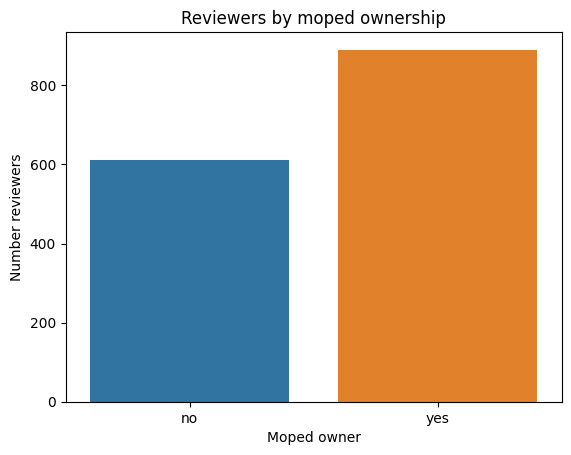

59 % of reviewers own mopeds, compared to 41 % who do not. The ratio is 1.46 :1


In [89]:
sns.countplot(data=df, x='owned')
plt.xticks([0,1], labels=['no', 'yes'])
plt.xlabel('Moped owner')
plt.ylabel('Number reviewers')
plt.title('Reviewers by moped ownership')
plt.show()


print(round(100*len(df[df['owned']==1])/len(df)), \
      '% of reviewers own mopeds, compared to', \
      round(100*len(df[df['owned']==0])/len(df)), \
      '% who do not. The ratio is', \
      round(len(df[df['owned']==1])/len(df[df['owned']==0]), 2), ':1')

People who own mopeds have left more reviews than those who do not. The data are not perfectly balanced, with 1.46x more reviewers owning mopeds than not.

## Task 3: Distribution of overall ratings


Description of ratings:
 count    1500.000000
mean       17.138907
std         2.445566
min        11.690000
25%        15.320000
50%        18.240000
75%        18.840000
max        22.760000
Name: overall_rating, dtype: float64


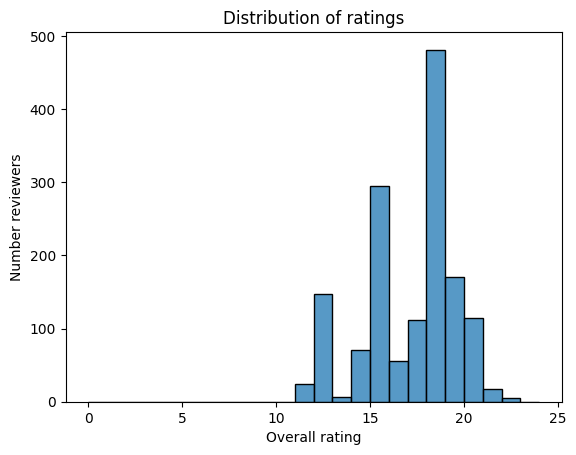

In [90]:
sns.histplot(data=df, x='overall_rating', bins=range(25))
plt.xlabel('Overall rating')
plt.ylabel('Number reviewers')
plt.title('Distribution of ratings')
print('Description of ratings:\n',df.overall_rating.describe())

Ratings theoretically can range from 0 to 25. In our data set, we see them ranging from 11.7 to 22.8, with a mean of 17.1 and median of 18.2. When we visualize the data in a histogram, we see a trimodal pattern, with peaks at 13, 16, and 19.

## Task 4: Relationship between ratings and moped ownership

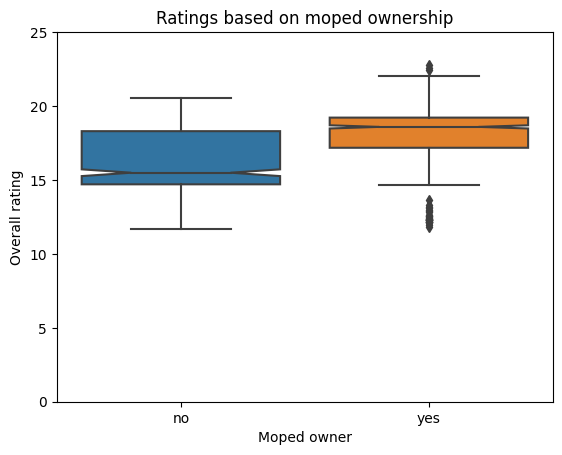

       count       mean       std    min      25%    50%      75%    max
owned                                                                   
0      610.0  15.733066  2.423420  11.69  14.7050  15.49  18.3000  20.55
1      890.0  18.102461  1.943137  11.79  17.1775  18.59  19.2175  22.76


In [91]:
sns.boxplot(data=df, x='owned', y='overall_rating', notch=True)
plt.ylim(0, 25)
plt.xticks([0,1], labels=['no', 'yes'])
plt.xlabel('Moped owner')
plt.ylabel('Overall rating')
plt.title('Ratings based on moped ownership')
plt.show()
print(df.groupby('owned')['overall_rating'].describe())

As seen in the plot above, owners of mopeds are more likely to leave higher reviews than non-owners. Owners have an average overall rating of 18.1, whereas non-owners have an average of 15.7. The lowest review given by each group is similar (11.7 vs. 11.8 for owners vs. non-owners, respectively), but the maximum and median ratings are higher from owners than non-owners. 

## Task 5: Machine learning type to use.
To determine if a review came from an owner or non-owner, I will use a classification model, rather than regression or clustering.

## Task 6: Fit baseline model to data
I will first try fitting a logistic regression model to the data, using `GridSearchCV` to optimize the `l1_ratio` and `C` parameters, using 5-fold cross-validation, after:
1. Creating dummy variables for categorical variables,
2. Using `train_test_split` to create training and test sets,
3. Using `StandardScaler` to standardize features.

In [92]:
# creating dummy variables
df_dummies=pd.get_dummies(df)
# dropping redundant columns -- for each set of dummy variables, one column can be removed because all informaiton is contained in the other columns
df_dummies = df_dummies.drop(['owned_0', 
                              'primary_use_Leisure', 
                              'make_model_Nielah-Keetra', 
                              'review_month_Dec', 
                              'web_browser_unknown'], axis=1)

# creating X array (remove 'owned_0' column from df) and y_array (the df.owned_0 column)
X=df_dummies.drop('owned_1', axis=1).values
y=df_dummies['owned_1'].values

# create train and test data, using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# scaling X data 
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)

# setting up GridSearchCV
parameters = {
    'l1_ratio': np.linspace(0,1,5), 
    'solver' : ['liblinear'], 
    'C': np.logspace(-2,2,5) 
}
lr=GridSearchCV(
    estimator=LogisticRegression(random_state=42), 
    param_grid=parameters, 
    cv=5
)

# fit logistic regression with GridSearchCV
lr.fit(X_train, y_train)
X_test=scaler.transform(X_test)
y_pred_lr=lr.predict(X_test)


print(lr.best_params_)

{'C': 10.0, 'l1_ratio': 0.0, 'solver': 'liblinear'}


## Task 7: Fit comparison model to data
I will now try fitting a random forest classifier model to the data, using `GridSearchCV` to optimize the `n_estimators` parameter, using 5-fold cross-validation. I'll use the same scaled data and train_test_split as used in Task 6.


In [93]:
# setting up GridSearchCV
parameters = {
    'n_estimators': [1, 10, 100, 1000]
}
rf=GridSearchCV(
    estimator=RandomForestClassifier(random_state=42), 
    param_grid=parameters, 
    cv=5
)

# fit random forest classifier with GridSearchCV
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)


print(rf.best_params_)

{'n_estimators': 100}


## Task 8: Explaining model choices

I decided to try Logistic Regression and Random Forest Classification models for this task. I chose Logistic Regression as my baseline because it is fairly simple and fast to implement. I chose a Random Forest model as a more complex option, which takes to run. Because it has very different behavior than the Logistic Regression, however, the Random Forest may be able to detect different relevant features in the dataset. 

## Task 9: Comparing model performance

I will compare the models using a confusion matrix, which shows the number of True Positives, True Negatives, False Positives, and False Negatives detected by the two models. 

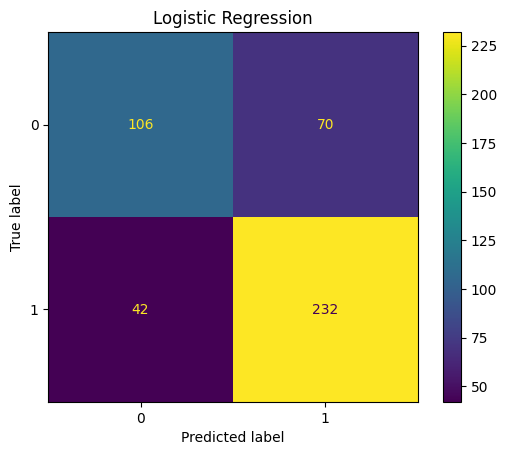

Precision for logistic regression is: 77.0 %
Recall for logistic regression is: 85.0 %


<Figure size 640x480 with 0 Axes>

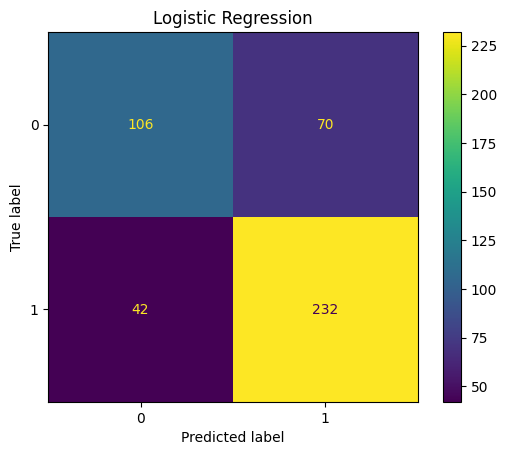

<Figure size 640x480 with 0 Axes>

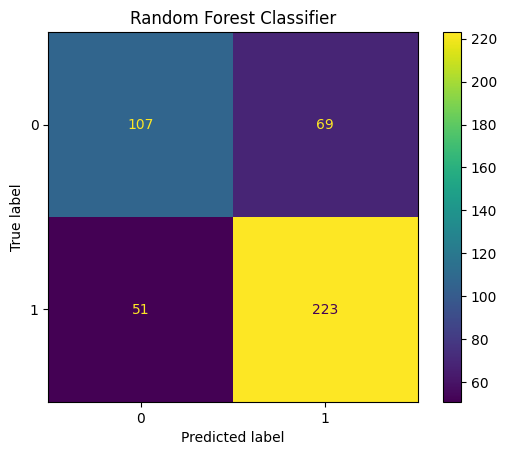

Precision for logistic regression is: 76.0 %
Recall for logistic regression is: 81.0 %


<Figure size 640x480 with 0 Axes>

In [94]:
# Logistic regression
disp=metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred_lr))
disp.plot()
plt.title('Logistic Regression')
plt.show()
plt.clf()
print('Precision for logistic regression is:', round(metrics.precision_score(y_test, y_pred_lr),2)*100, '%')
print('Recall for logistic regression is:', round(metrics.recall_score(y_test, y_pred_lr),2)*100, '%')

disp.plot()
plt.title('Logistic Regression')
plt.show()
plt.clf()
# Random forest
disp=metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred_rf))
disp.plot()
plt.title('Random Forest Classifier')
plt.show()
plt.clf()
print('Precision for logistic regression is:', round(metrics.precision_score(y_test, y_pred_rf),2)*100, '%')
print('Recall for logistic regression is:', round(metrics.recall_score(y_test, y_pred_rf),2)*100, '%')


## Task 10: Explain which model has better performance

The two models perform similarly well, with the Logistic Regression model having slightly better precision and recall scores. 

The Logistic Regression correctly predicts reviews from 106 non-owners and 232 owners of mopeds, as compared to the Random Forest, which correctly predicts 107 non-owners and 223 owners. While the Random Forest is slightly better at predicting reviews from non-owners, the Logistic Regression is better at predicting reviews from owners. As a result, the Logistic Regression has precision and recall scores of 77% and 85%, respectively, compared to 76% and 81% from the Random Forest.

Both models have decent performance, but because Logistic Regression is simpler and has better recall, I would recommend that EMO use this model for predicting whether or not reviewers own mopeds.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam